In [ ]:
# !pip install dataframe_image

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (12,12)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Cleaned.csv')

In [6]:
df

,Profession,Country,Region,Education,Sex,Age,AgeBin,Maritial,1.1_HeardCovid,1.2_Television/Radio,...,4.1_SocialExclusion,4.1_Lonliness,Access_Of_Information,N90BestToControlSpread,KnowledgeScore,OpinionScoring,Susceptiblity,BehaveScore,PsychologicalHeath,LearntCovid
2207,Academian/Administration,China,"East Asia (China, Japan, South korea)",NaN,Female,27,"(24.0, 30.0]",2,0,0.0,...,1,1,NaN,0,17,13,2,4,4,2.0
2208,Academian/Administration,China,"East Asia (China, Japan, South korea)",NaN,Female,39,"(30.0, 41.0]",2,1,1.0,...,0,0,NaN,0,15,9,2,3,2,2.0
2209,Medical Professionals,China,"East Asia (China, Japan, South korea)",T,Female,27,"(24.0, 30.0]",3,1,1.0,...,1,1,NaN,0,13,8,0,5,4,2.0
2210,Medical Professionals,China,"East Asia (China, Japan, South korea)",S,Male,27,"(24.0, 30.0]",3,1,1.0,...,1,1,NaN,0,6,6,1,7,4,4.0
2211,Academian/Administration,China,"East Asia (China, Japan, South korea)",T,Male,51,"(41.0, 76.0]",2,0,1.0,...,1,0,NaN,0,13,10,3,6,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,Academian/Administration,China,"East Asia (China, Japan, South korea)",T,Female,63,"(41.0, 76.0]",2,0,1.0,...,0,0,NaN,0,12,3,0,4,0,5.0
3016,Academian/Administration,China,"East Asia (China, Japan, South korea)",T,Female,61,"(41.0, 76.0]",2,0,1.0,...,0,0,NaN,0,12,3,0,4,0,5.0
3017,Academian/Administration,China,"East Asia (China, Japan, South korea)",T,Female,66,"(41.0, 76.0]",2,0,1.0,...,0,0,NaN,0,12,3,0,4,0,5.0
3018,Academian/Administration,China,"East Asia (China, Japan, South korea)",T,Female,64,"(41.0, 76.0]",2,0,1.0,...,0,0,NaN,0,12,3,0,4,0,5.0


In [8]:
df.columns

Index(['Profession', 'Country', 'Region', 'Education', 'Sex', 'Age', 'AgeBin',
       'Maritial', '1.1_HeardCovid', '1.2_Television/Radio',
       '1.2_Newspaper/Magazines', '1.2_SocialMedia',
       '1.2_Colleagues/Workplace', '1.2_Neighbors', '1.3_CovidKnowledgeLevel',
       '1.4_ContactRespiratoryDrop', '1.4_Touching', '1.4_UseSameObject',
       '1.4_Sex', '1.4_PersonToPerson', '1.4_CloseContact', '1.4_TouchingCoin',
       '1.4_CovidFloatOnAir', '1.5_Fever', '1.5_Tiredness', '1.5_Cough',
       '1.5_ShortnessBreath', '1.5_AchesPain', '1.5_NasalCongestion',
       '1.5_RunningNose', '1.5_SoreThroat', '1.5_Diarrhea', '1.6_Mask',
       '1.7_IncubationPeriod', '1.8_Vaccine', '1.9_LockDown', '1.9_Isolation',
       '1.9_Quarantine', '1.10_Over60Yr', '1.10_PrexistingCond',
       '1.10_WorkEnvo', '1.10_RiskZone', '2.1_LockDown', '2.2_HomeQuarantine',
       '2.3_Isolation', '2.4_PersonalHygiene', '2.5_MediaRole', '2.6_Over60Yr',
       '2.6_PreExisting', '2.6_Working', '2.6_RiskZone',

In [3]:
df['3.9_Newspaper']

0       0
1       1
2       0
3       1
4       0
       ..
3026    0
3027    0
3028    0
3029    0
3030    1
Name: 3.9_Newspaper, Length: 3031, dtype: int64

In [9]:
df['3.10_TimeSpentOnCovidNews'].value_counts()


1    1372
2     631
3     504
4     303
5     221
Name: 3.10_TimeSpentOnCovidNews, dtype: int64

In [13]:
df.AgeBin.value_counts().sum()

3031

In [9]:
#Ref  https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/older-adults.html
# bins = pd.IntervalIndex.from_tuples([(0,30),(30,40),(40,50),(50,64),(64,np.inf)])
bins = pd.IntervalIndex.from_tuples([(0,25),(25,50),(50,np.inf)])
df['AgeBin'] = pd.cut(df.Age,bins)
df.AgeBin.value_counts()

(25.0, 50.0]    1369
(0.0, 25.0]     1351
(50.0, inf]      311
Name: AgeBin, dtype: int64

In [116]:
cleaned = cleaned[~((cleaned['Country'].isin(['Mexico'])) & (cleaned['Education'] =='P'))]

In [7]:
countries = ['China', 'Mexico', 'Bangladesh', 'United States','Malaysia','Pakistan','Zambia','Japan']
cleaned =df[df['Country'].isin(countries)]
# cleaned = cleaned[~((cleaned['Country'].isin(['Bangladesh','Pakistan'])) & (cleaned['Age'] > 50))]
# cleaned = cleaned[~((cleaned['Country'].isin(['Mexico'])) & (cleaned['Education'] =='P'))]
# cleaned = cleaned.drop((cleaned['Country'] == ' Bangladesh') & (cleaned['Age'] > 50)) 
cleaned.groupby(['Country','Profession'])['Access_Of_Information'].mean()

Country        Profession              
Bangladesh     Academian/Administration    3.142857
               Medical Professionals       3.103858
               Others                      2.777778
China          Academian/Administration         NaN
               Medical Professionals            NaN
Japan          Academian/Administration    2.355932
               Medical Professionals       2.650000
               Others                      2.250000
Malaysia       Academian/Administration    3.313725
               Medical Professionals       3.215054
               Others                      3.000000
Mexico         Academian/Administration    2.662757
               Medical Professionals       2.633621
               Others                      2.454545
Pakistan       Academian/Administration    2.901639
               Medical Professionals       3.171946
               Others                      3.000000
United States  Academian/Administration    2.815451
               Medical P

In [8]:
cleaned.groupby(['Country','Profession'])['Access_Of_Information'].std()

Country        Profession              
Bangladesh     Academian/Administration    0.819288
               Medical Professionals       0.864934
               Others                      0.833333
China          Academian/Administration         NaN
               Medical Professionals            NaN
Japan          Academian/Administration    0.846142
               Medical Professionals       0.875094
               Others                      1.164965
Malaysia       Academian/Administration    0.882954
               Medical Professionals       0.845055
               Others                      0.816497
Mexico         Academian/Administration    0.894784
               Medical Professionals       0.805441
               Others                      1.184313
Pakistan       Academian/Administration    0.943485
               Medical Professionals       0.829748
               Others                      0.000000
United States  Academian/Administration    0.907498
               Medical P

### 

In [64]:
countries = df.Country.value_counts().index[:6].tolist()
countries

['China', 'Mexico', 'Bangladesh', 'United States', 'Pakistan', 'Malaysia']

In [119]:
df = cleaned

<h1> Generating Graph </h1>

In [120]:
#Create Necessary Dirs
import os
import dataframe_image as dfi
criterion = ['Access_Of_Information', 'KnowledgeScore', 'OpinionScoring',
       'Susceptiblity', 'BehaveScore', 'PsychologicalHeath', 'LearntCovid']
field = ['Education']
for c in criterion:
    for f in field:
        if not os.path.exists(os.path.join('Graph',c,f)):
            os.makedirs(os.path.join('Graph',c,f))

In [121]:
from scipy import stats
def chi_squared_test(df,country,column1,column2,prob=0.90):
#     print(column2,df[column2])
    contingency_table = pd.crosstab(df[column1],df[column2])
#     print(column1,column2,contingency_table)
    stat,p,dof,expected = stats.chi2_contingency(contingency_table)
    critical = stats.chi2.ppf(prob,dof)
    contingency_table.plot.bar(stacked=False)
    plt.title(country,fontsize=100)
    plt.tight_layout()
    plt.savefig(f'Graph/{column2}/{column1}/{column2}_{column1}_{country}.png',dpi=80)
    return country, stat,critical

In [122]:
import matplotlib 
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

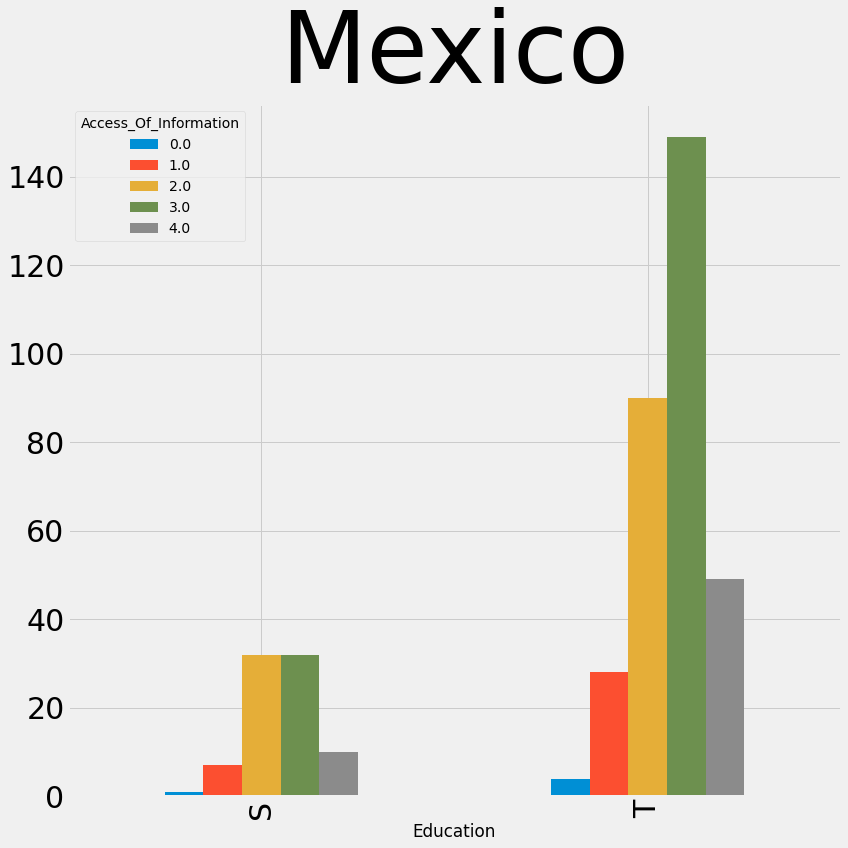

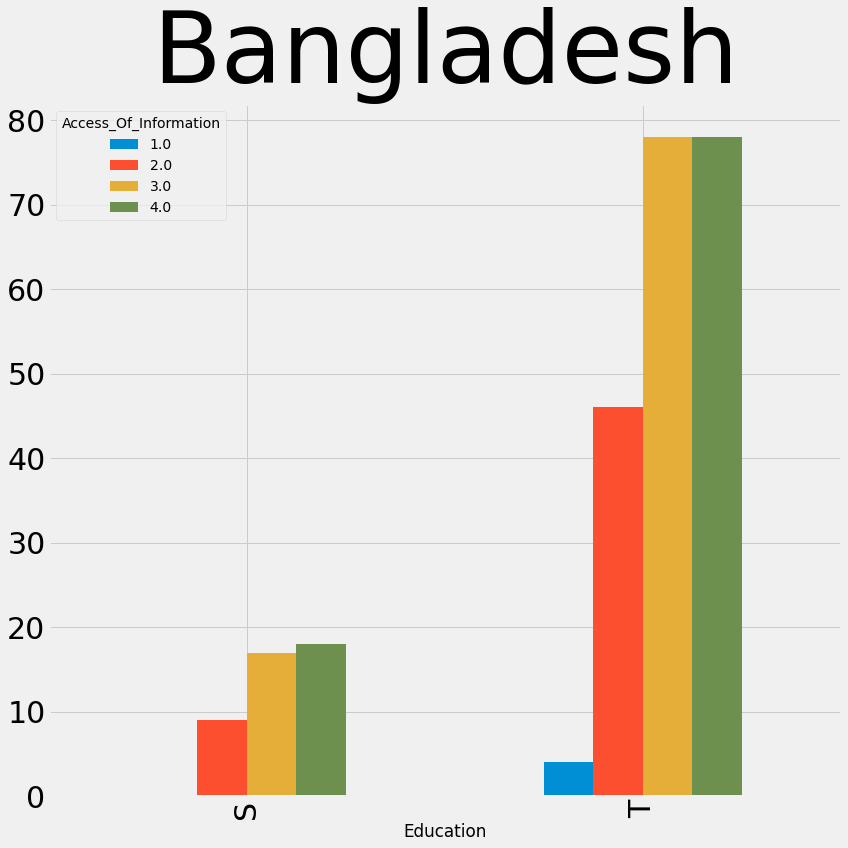

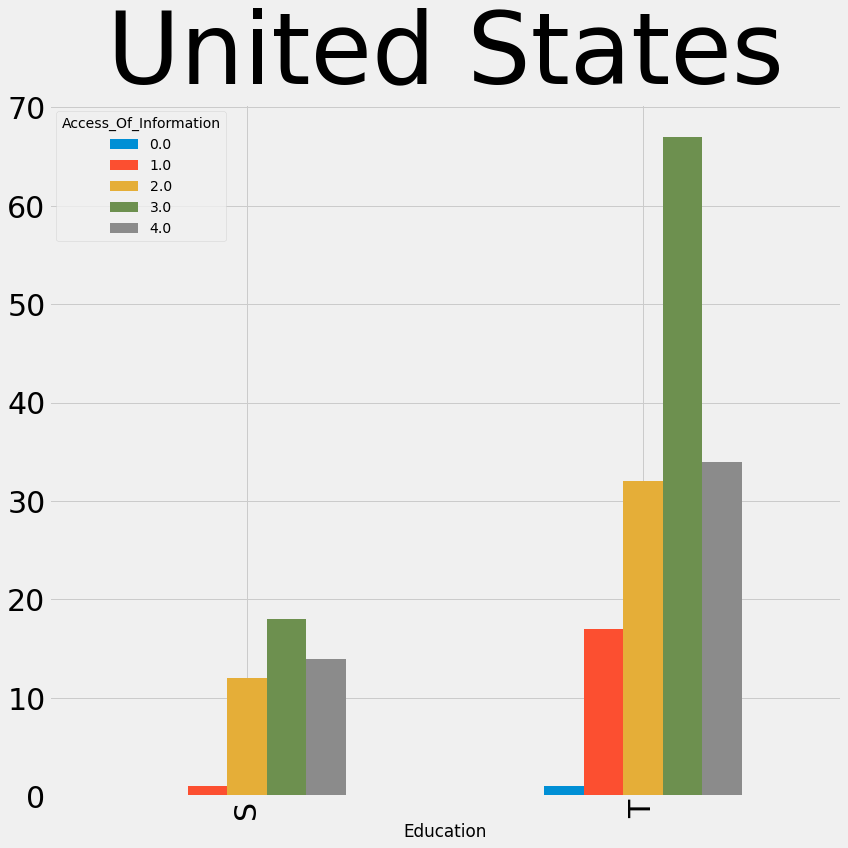

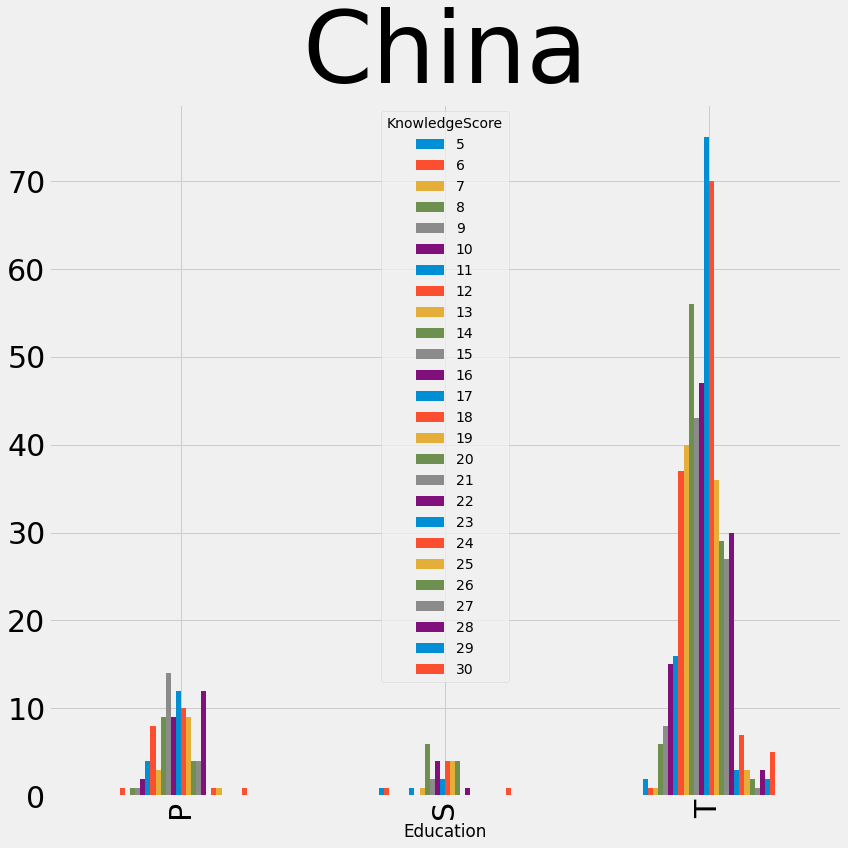

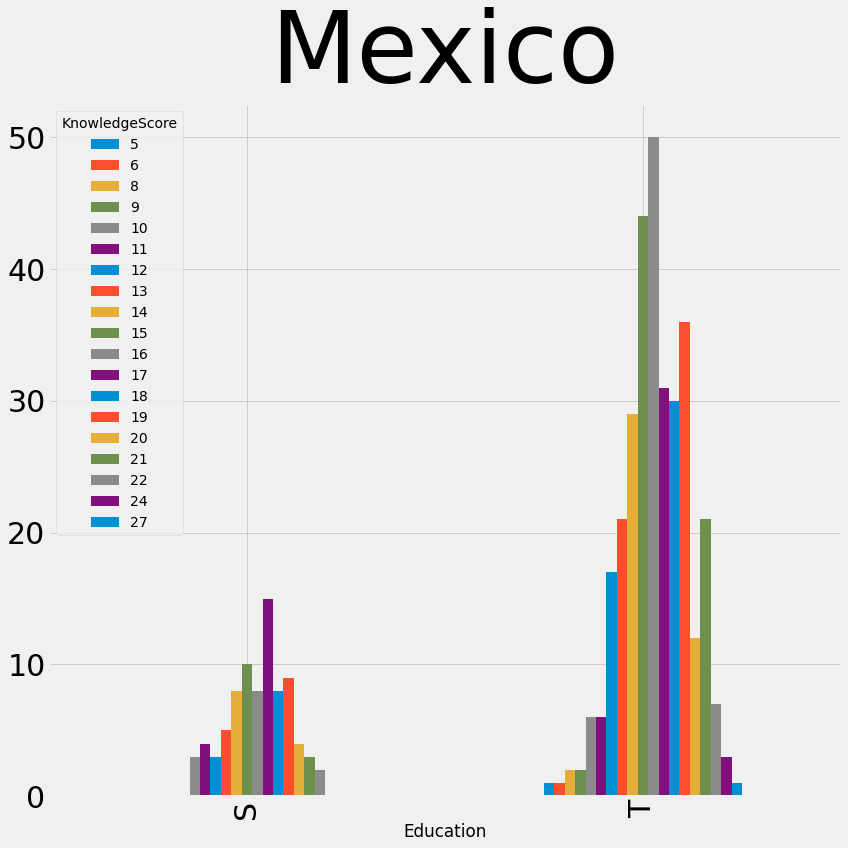

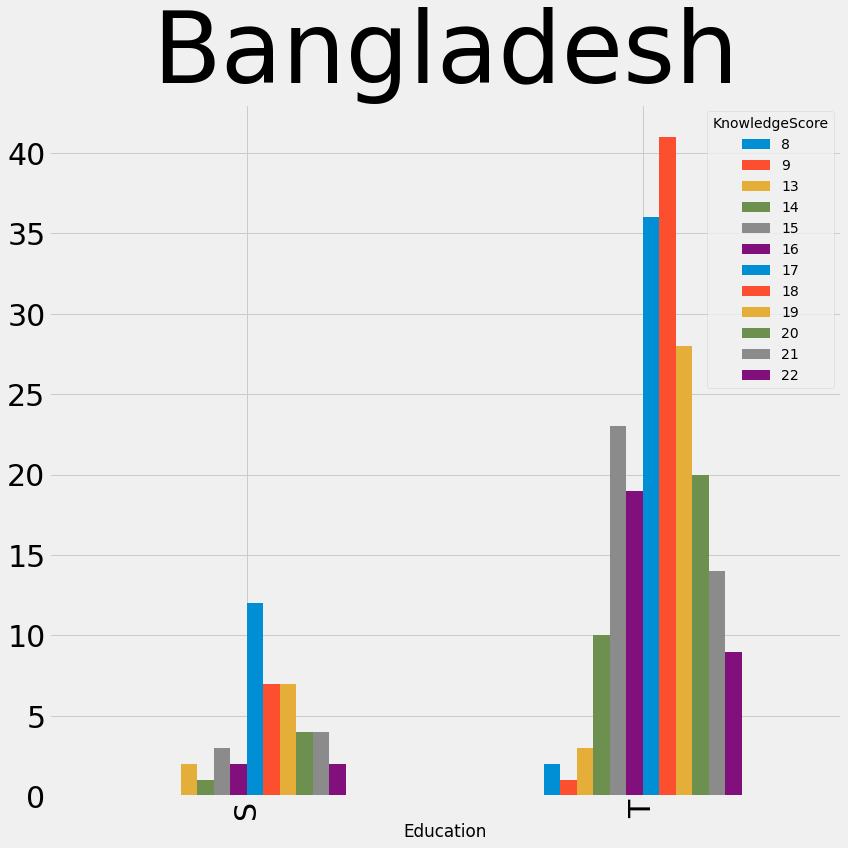

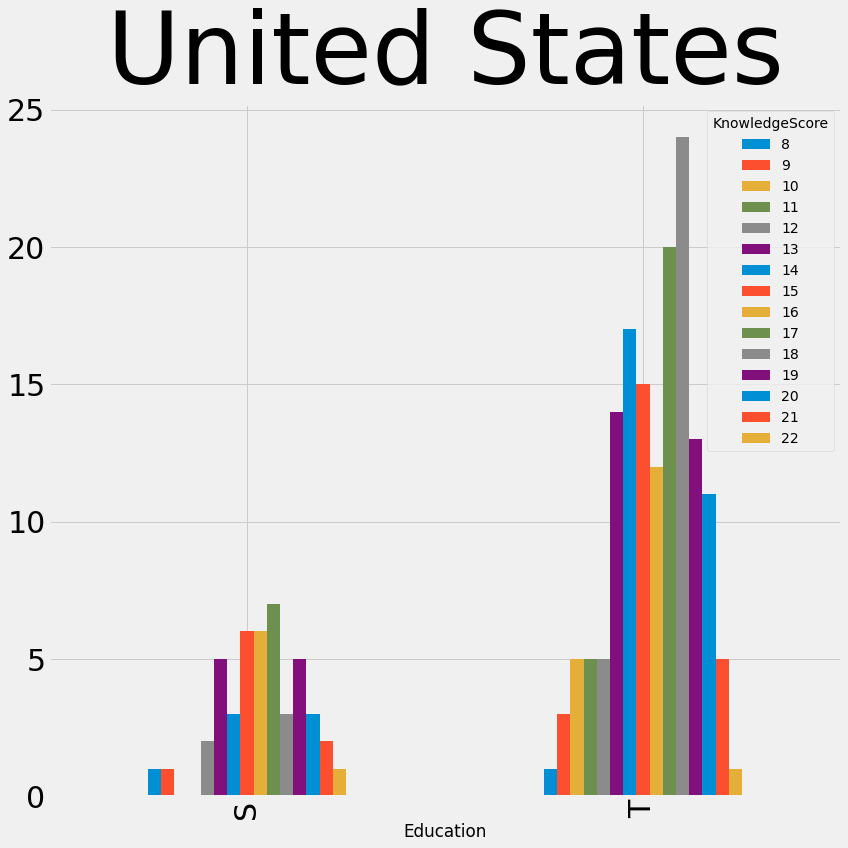

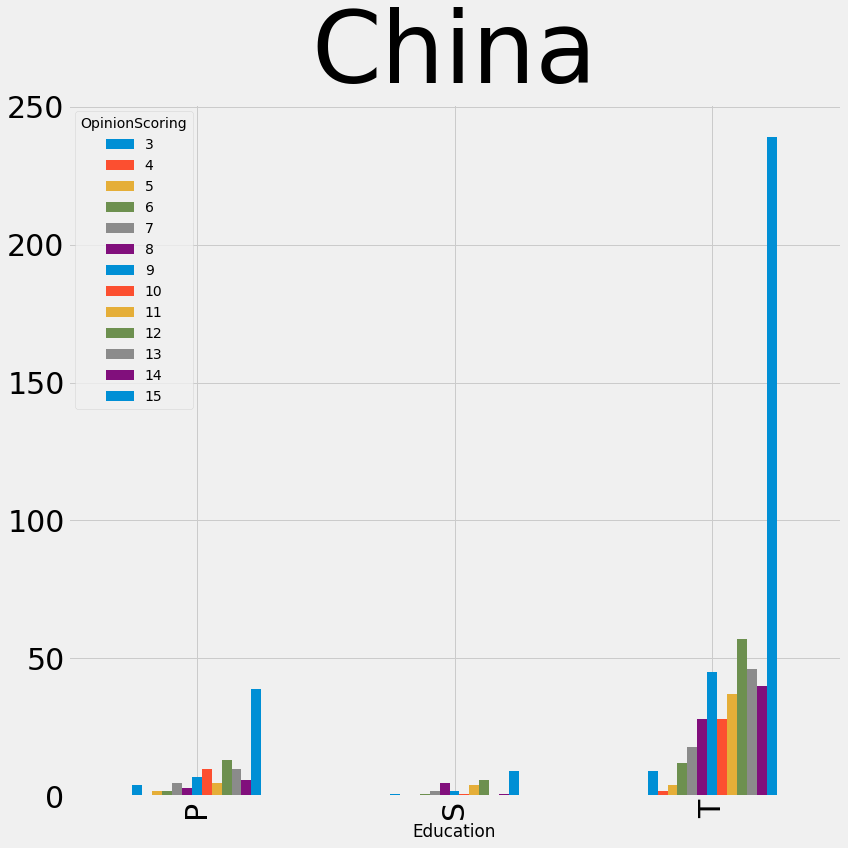

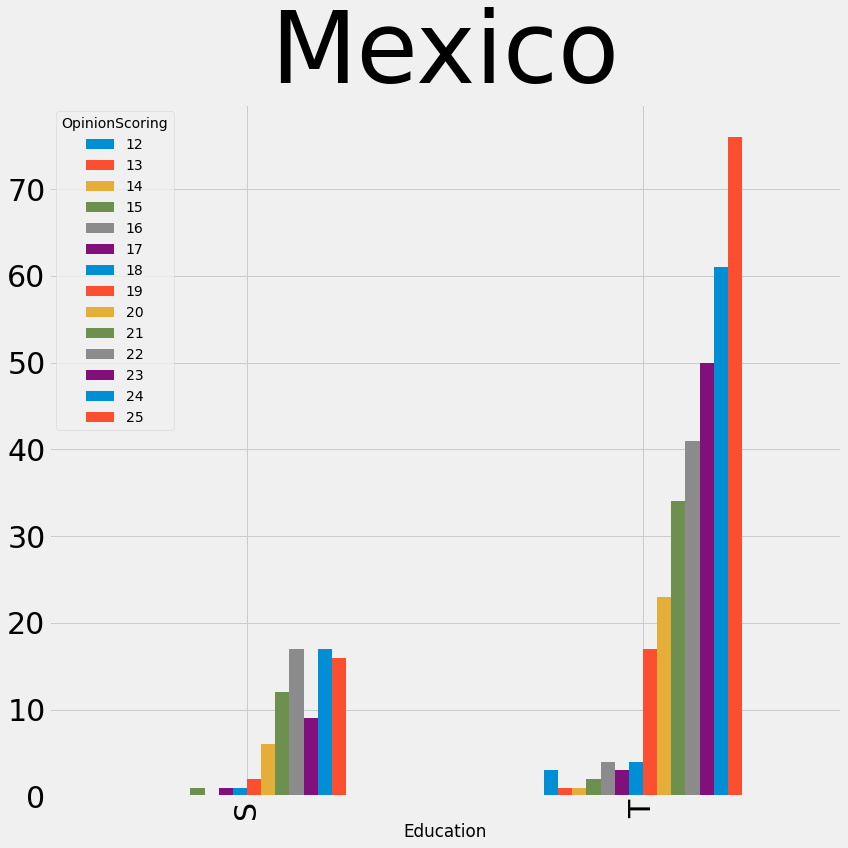

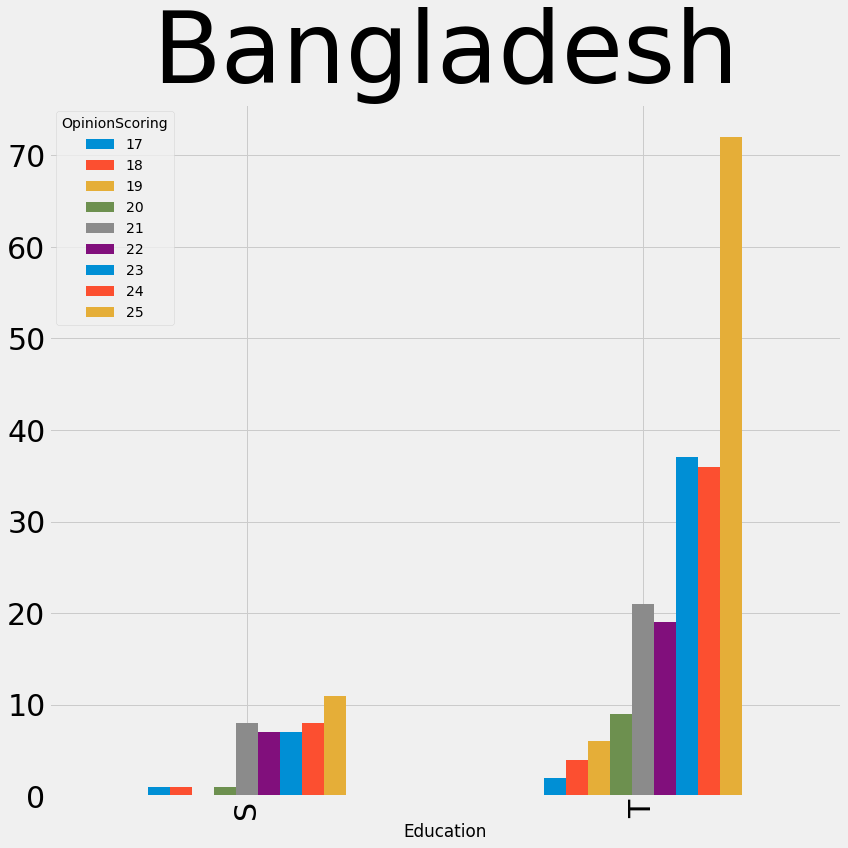

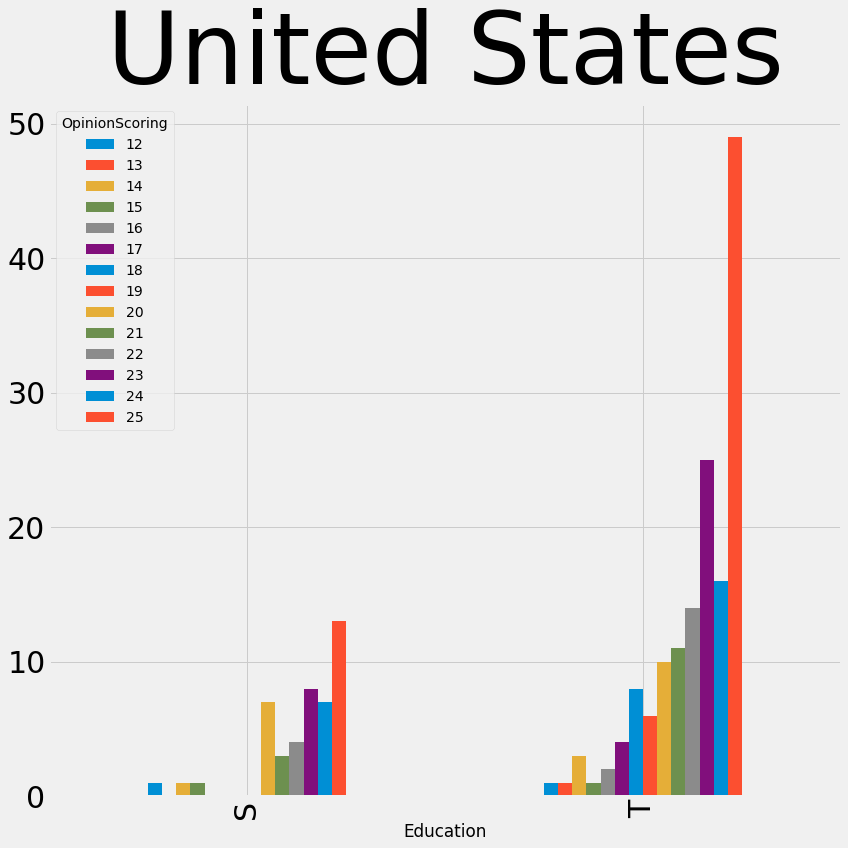

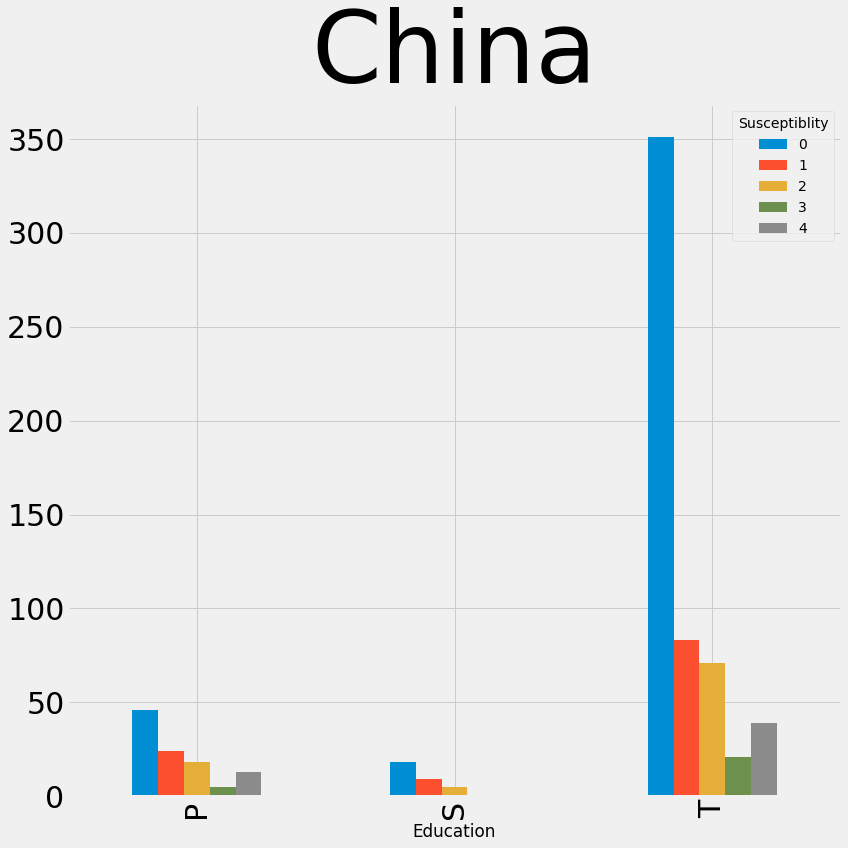

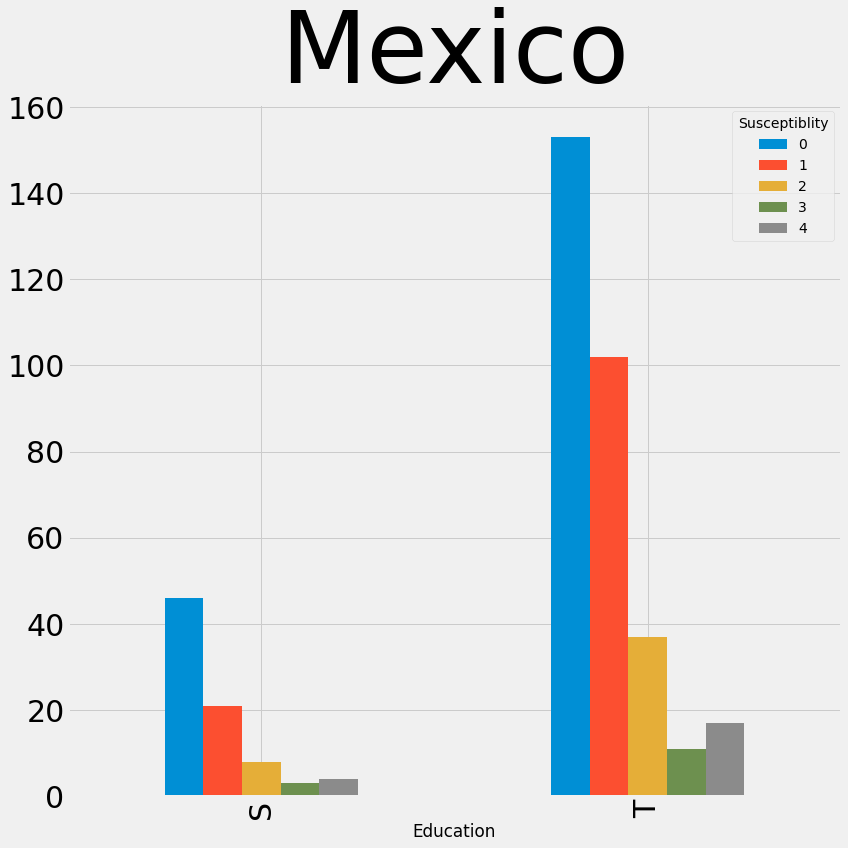

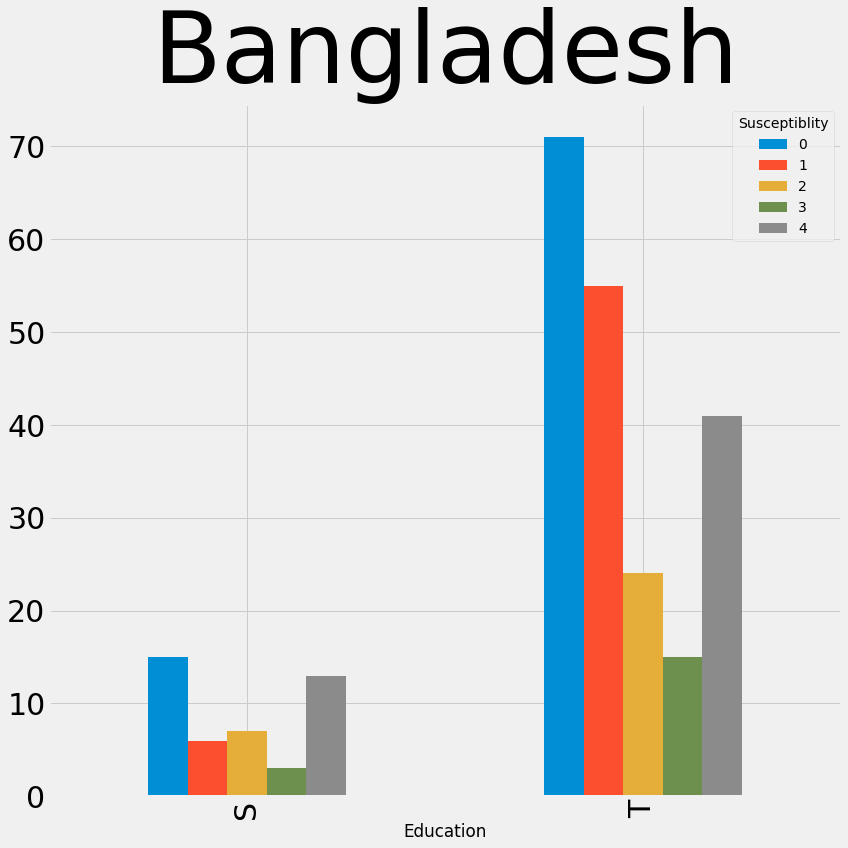

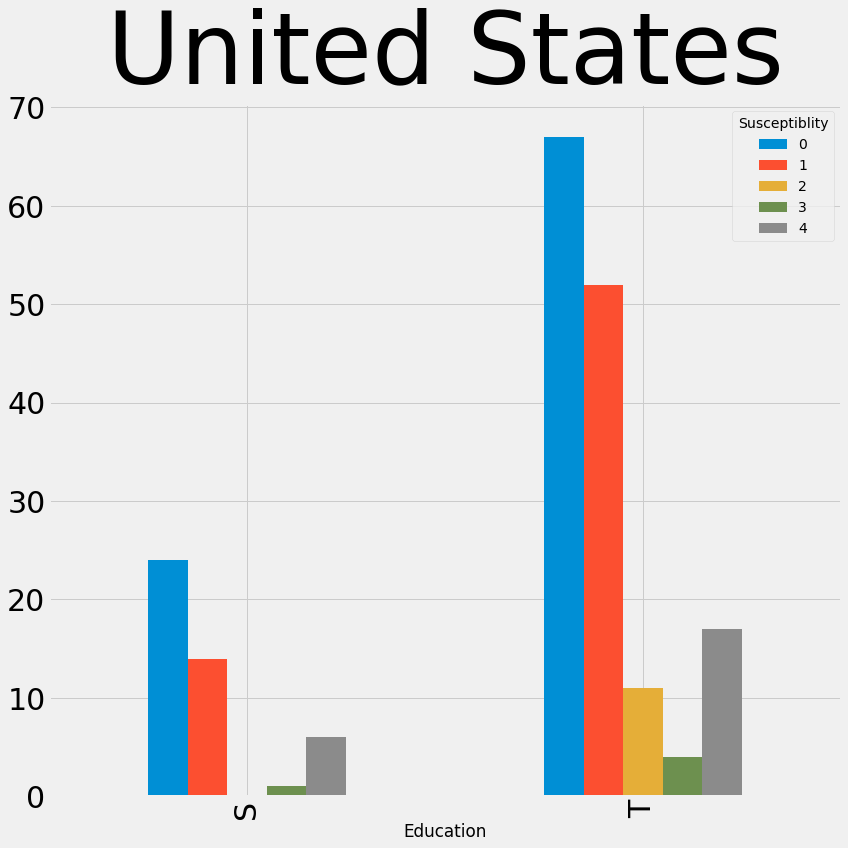

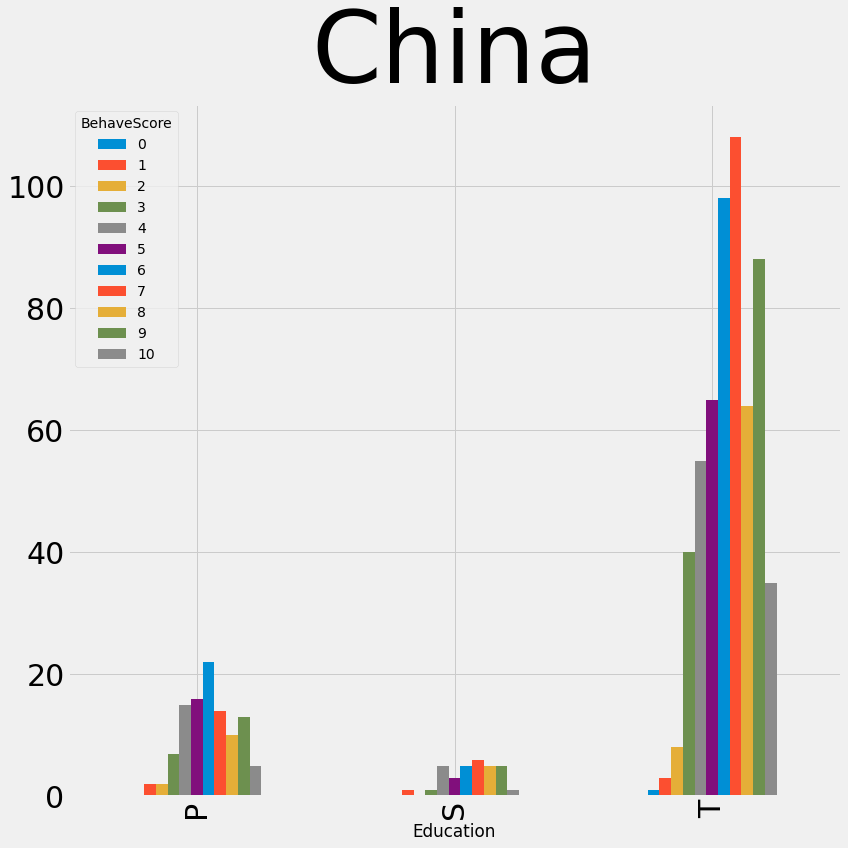

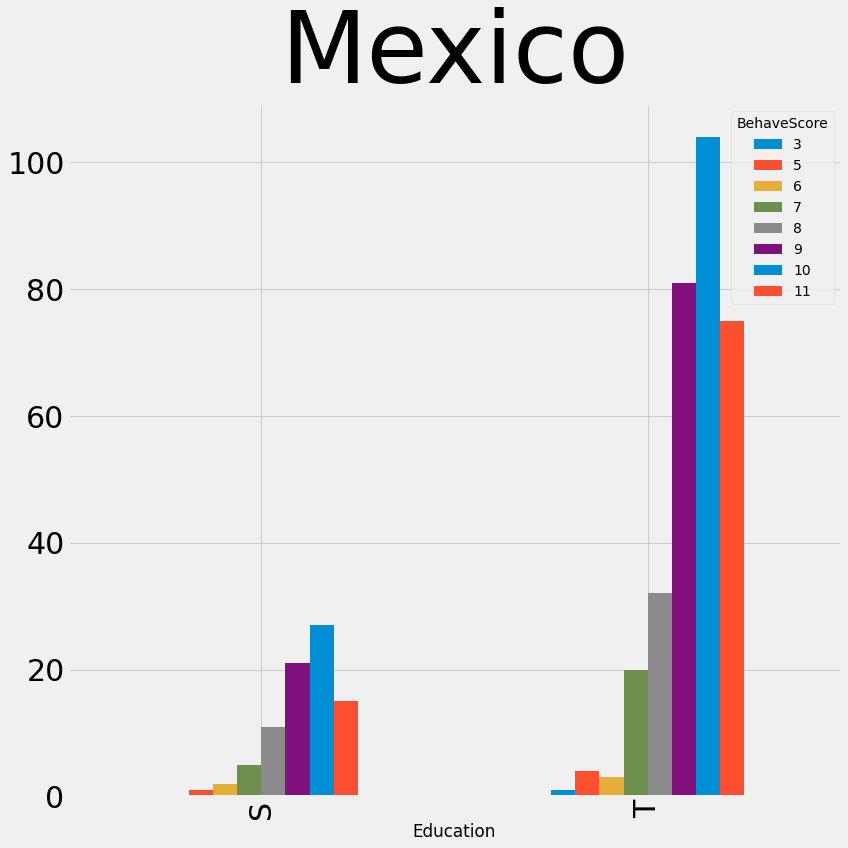

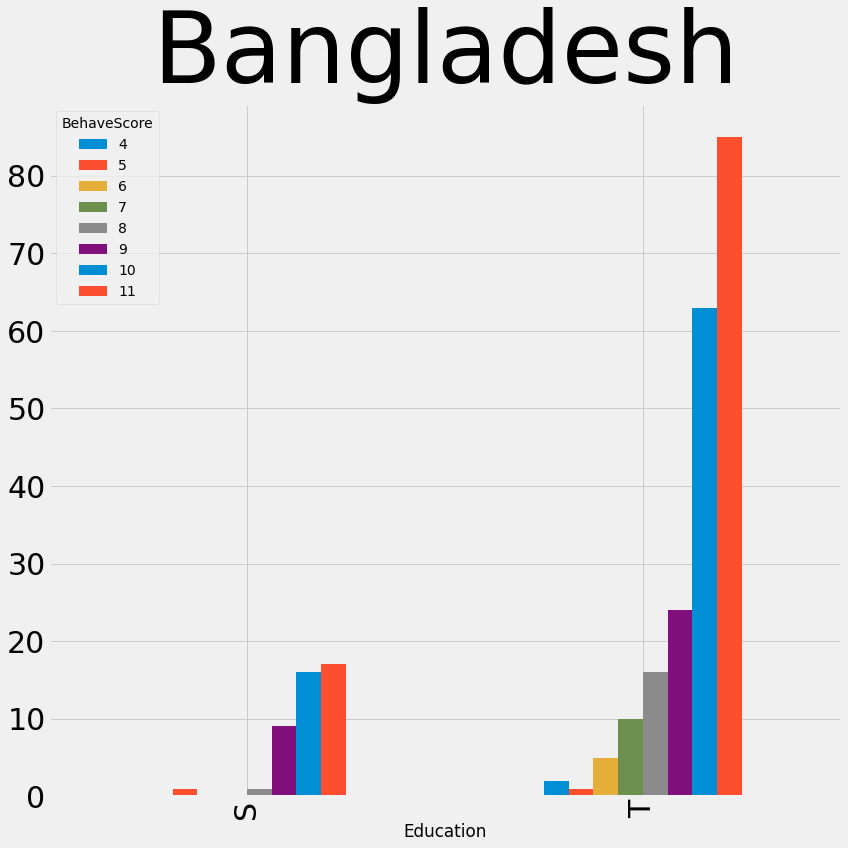

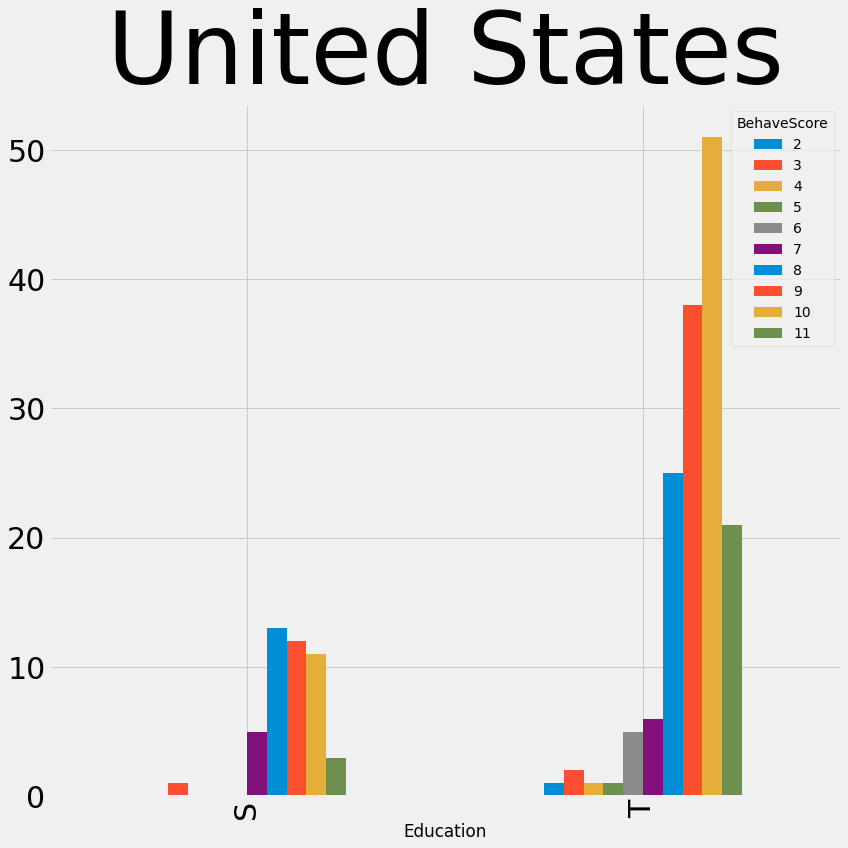

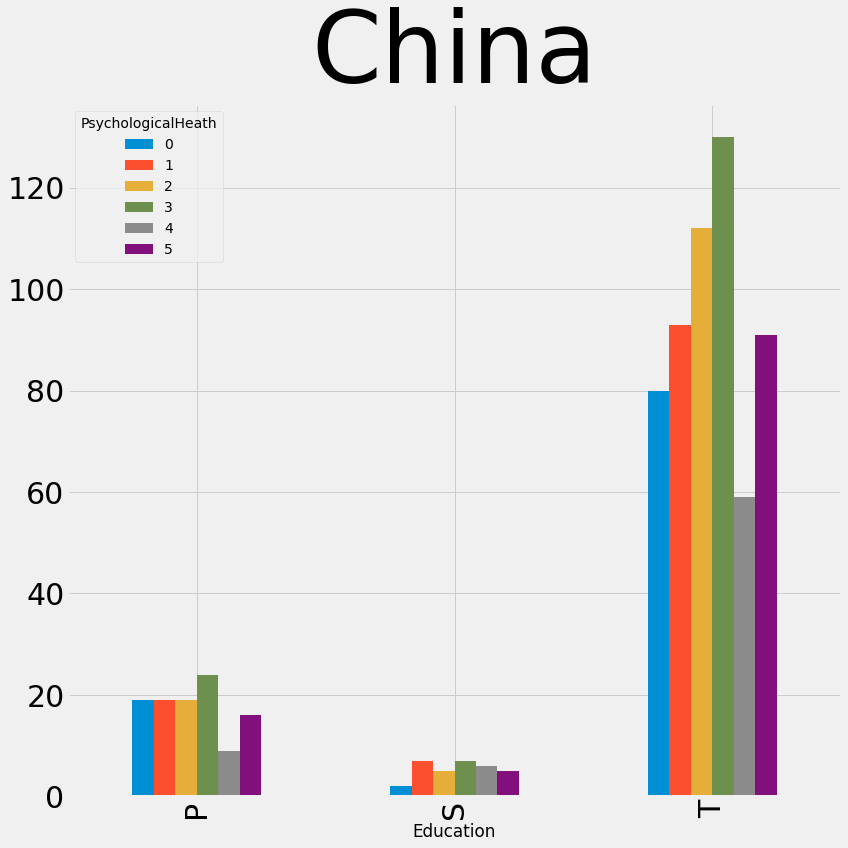

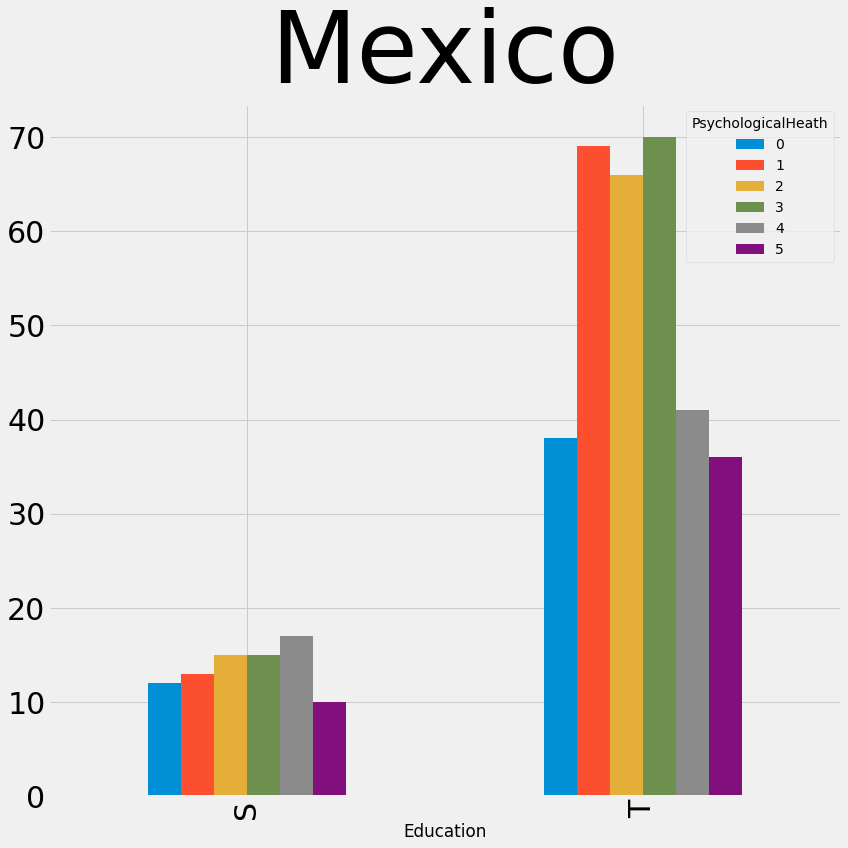

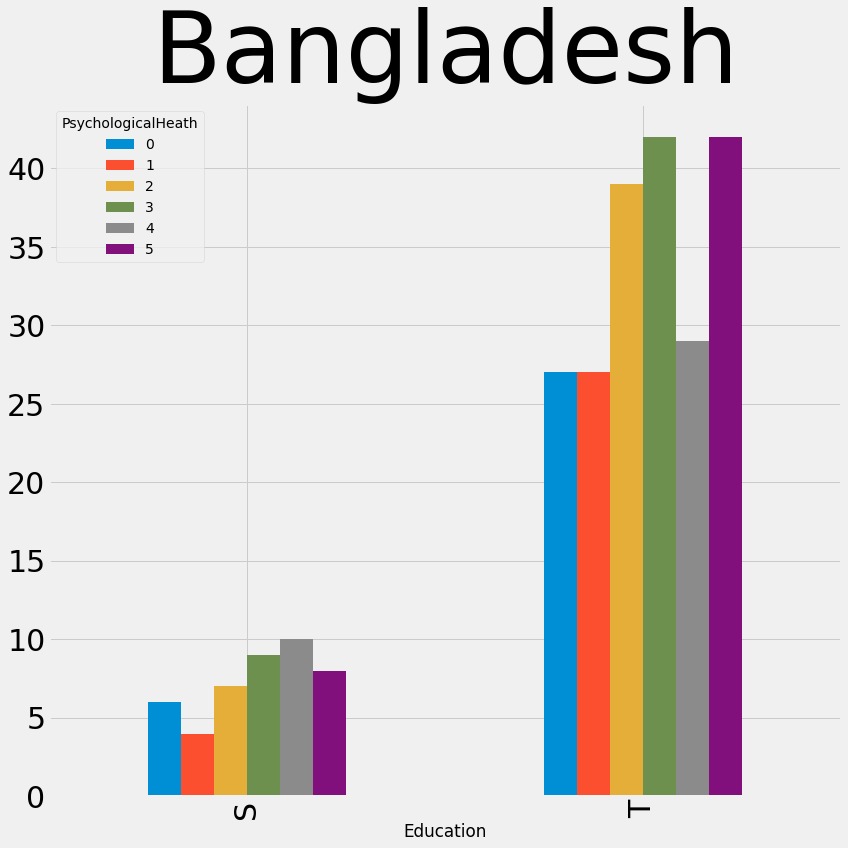

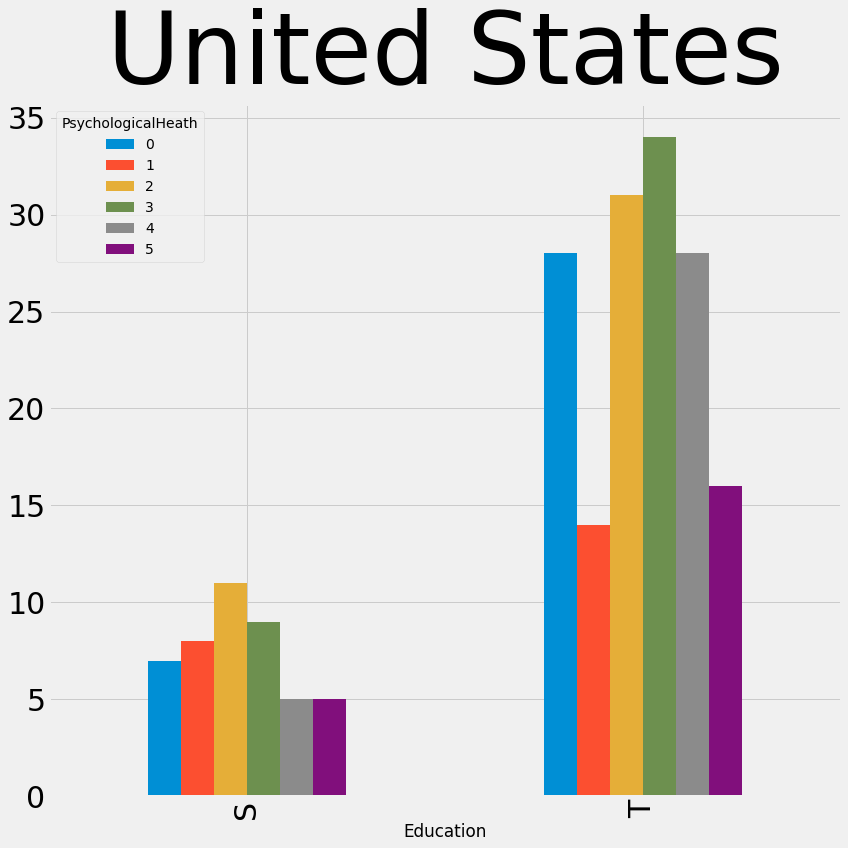

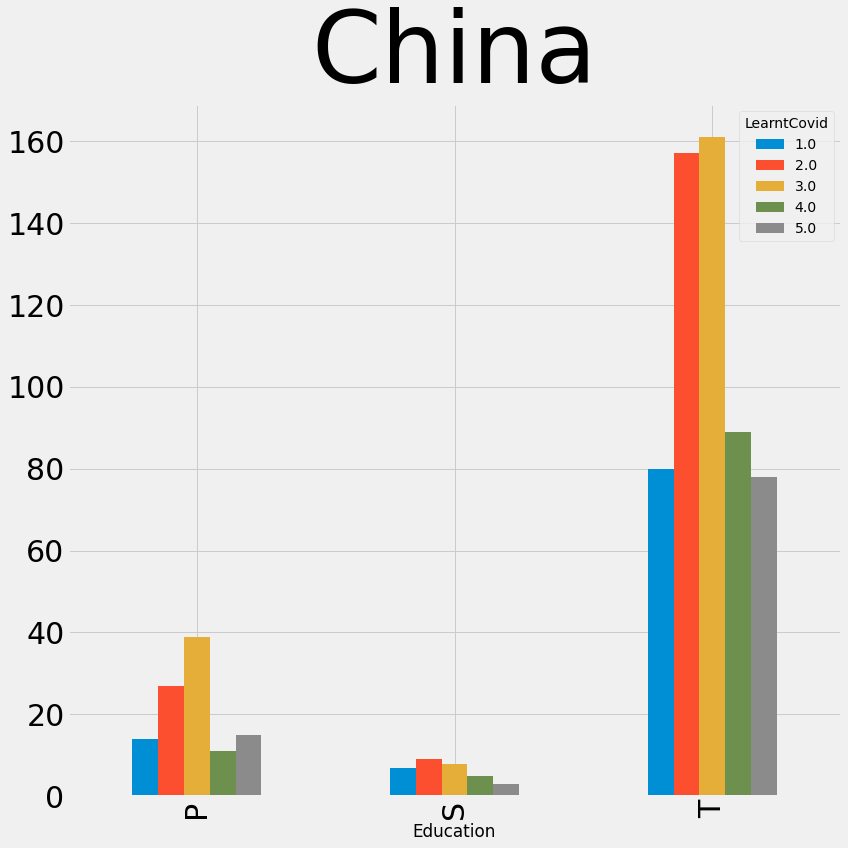

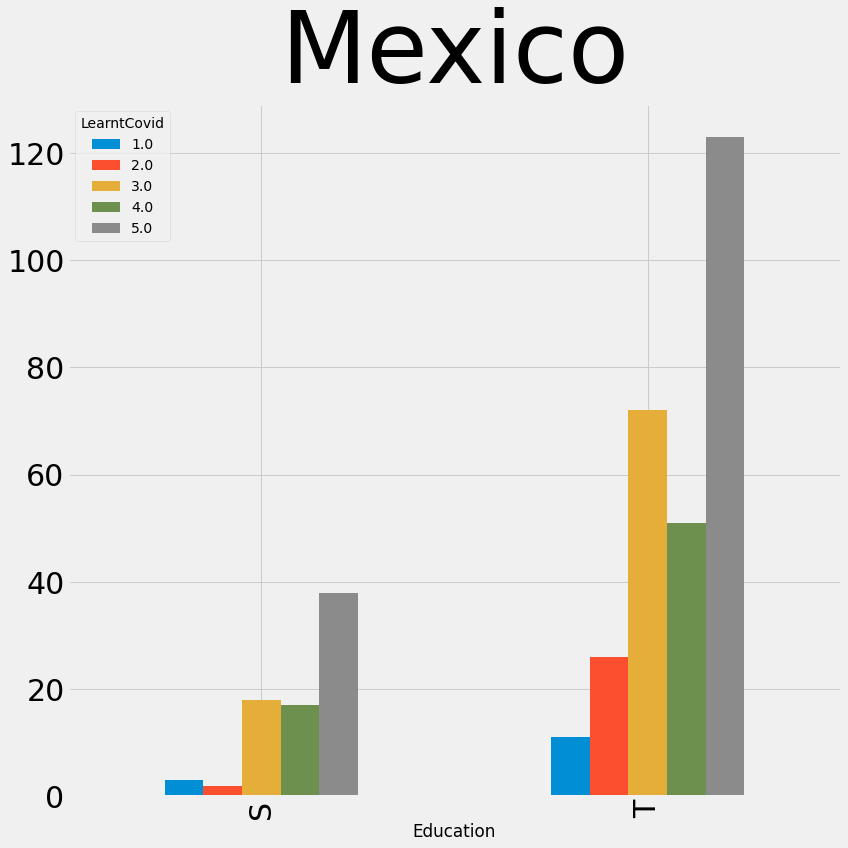

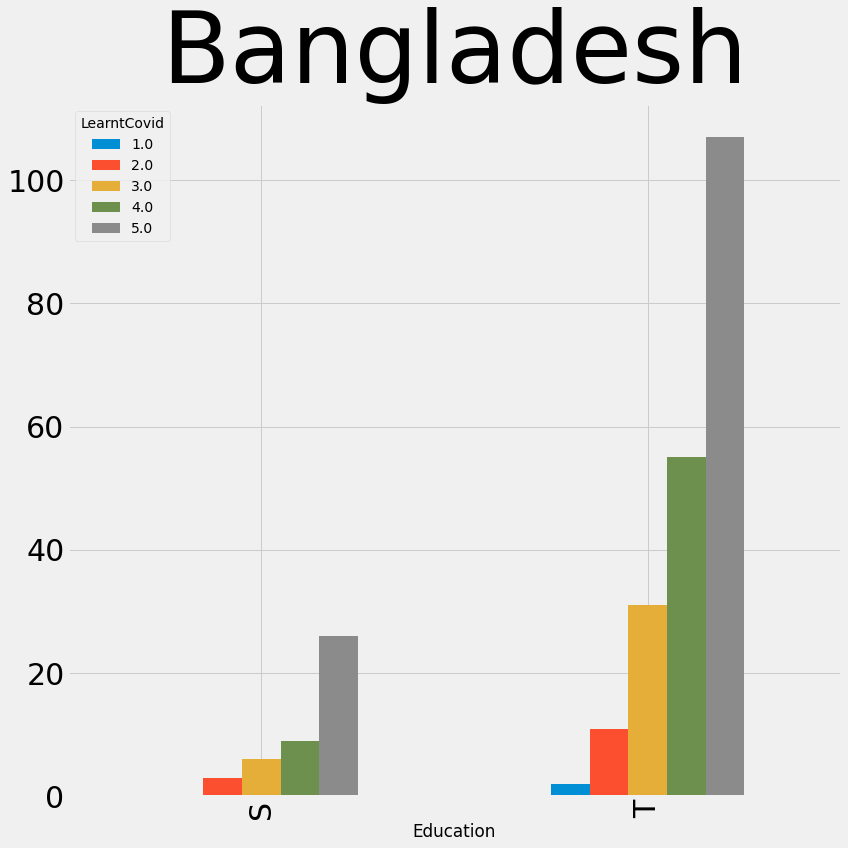

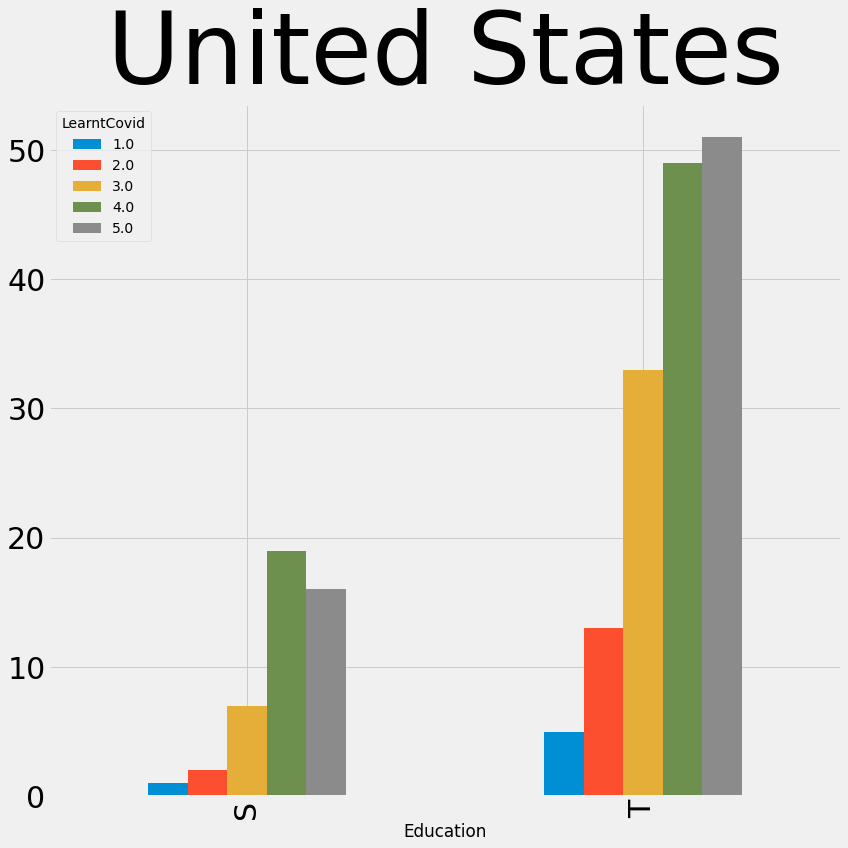

In [123]:
for c in criterion:
    for f in field:
        results = []
        for i, country in enumerate(countries):
            df_test = df[df['Country'] == country]
            if not (country == 'China' and c =='Access_Of_Information'):
                results.append(chi_squared_test(df_test,country,f,c))
        output = pd.DataFrame(results, columns = ['Country','Value', 'Critical'])
        output['Significant'] = output['Value'] > output['Critical']
        df_styled = output.style.background_gradient()
        dfi.export(df_styled,f"Graph/{c}/{f}/table.png")

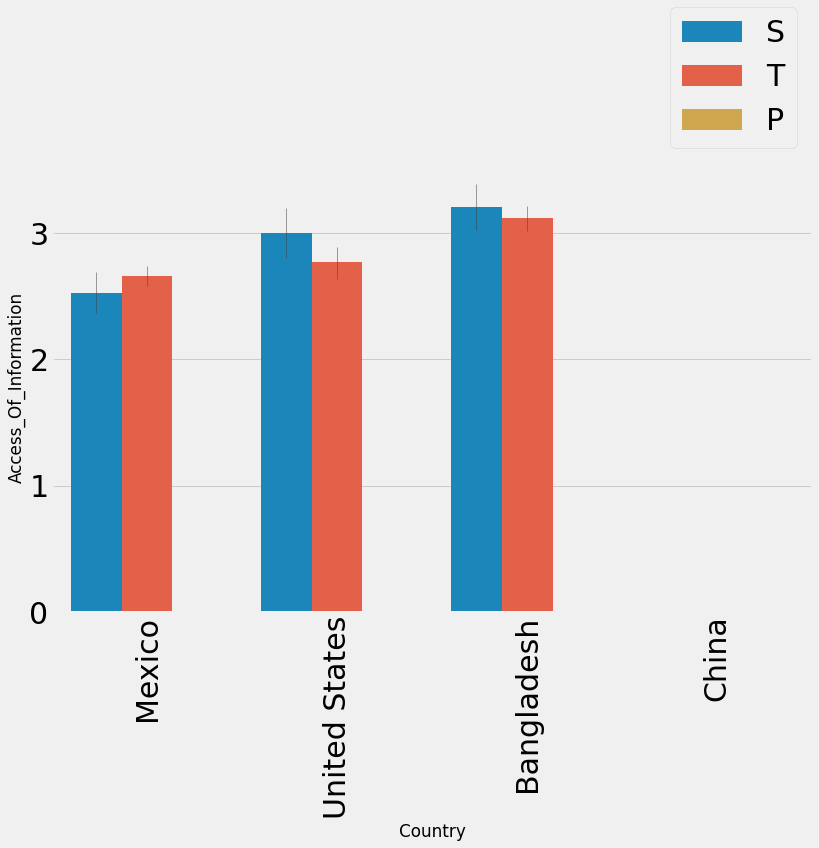

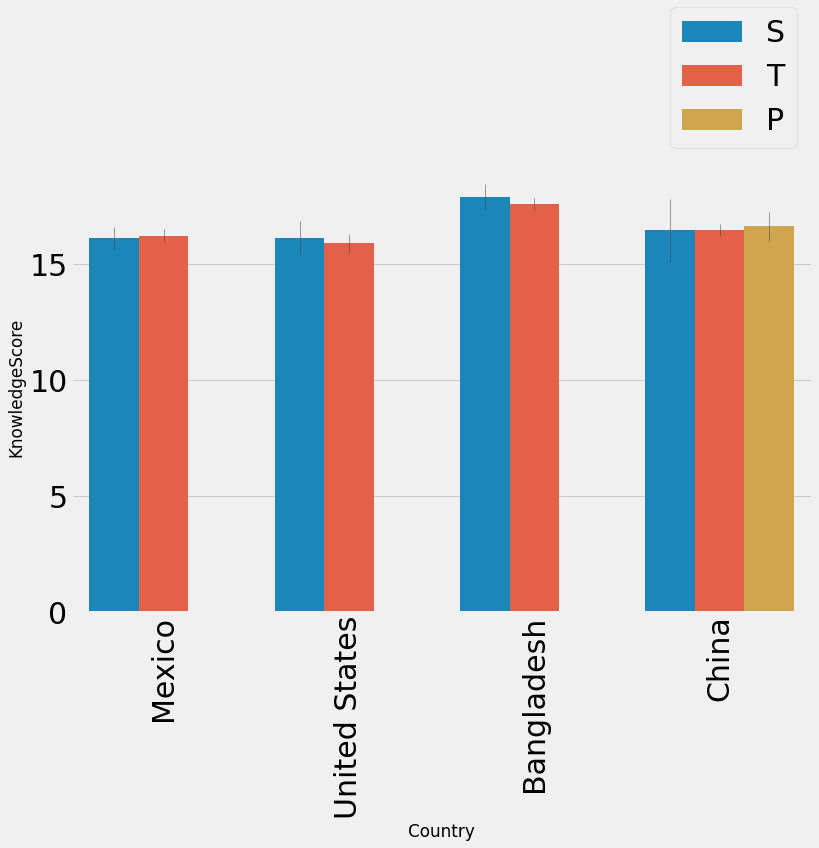

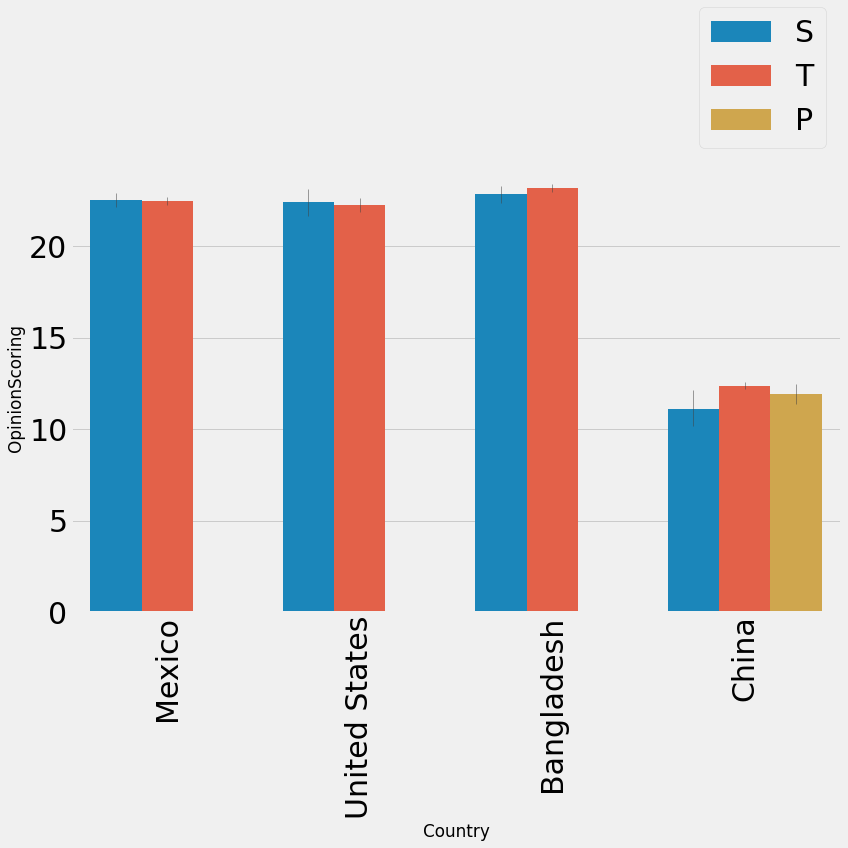

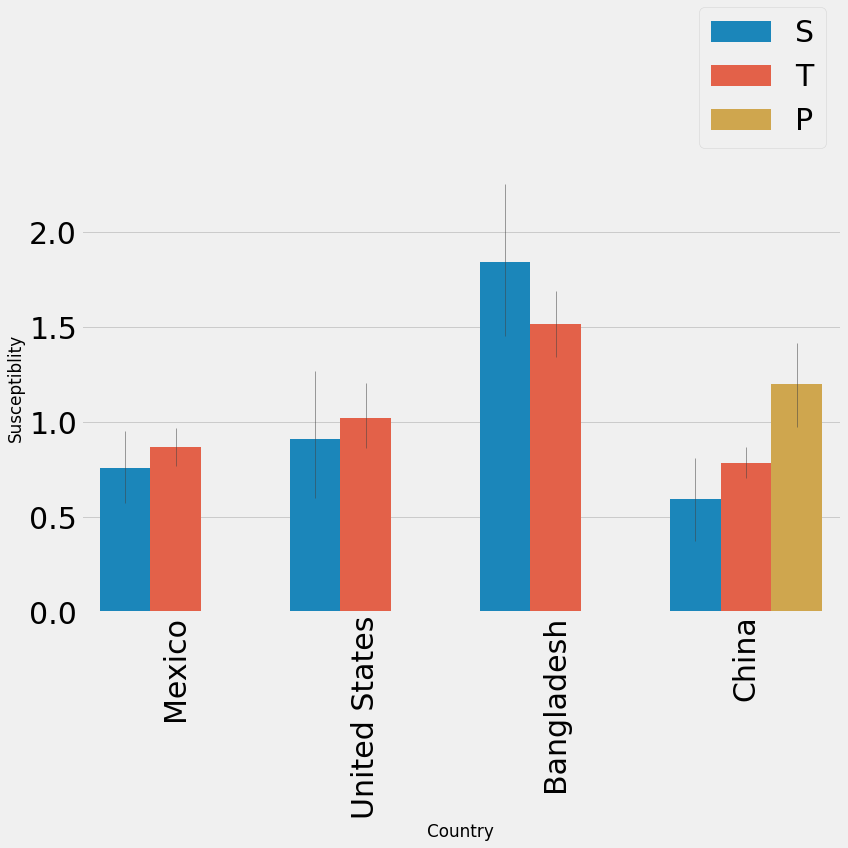

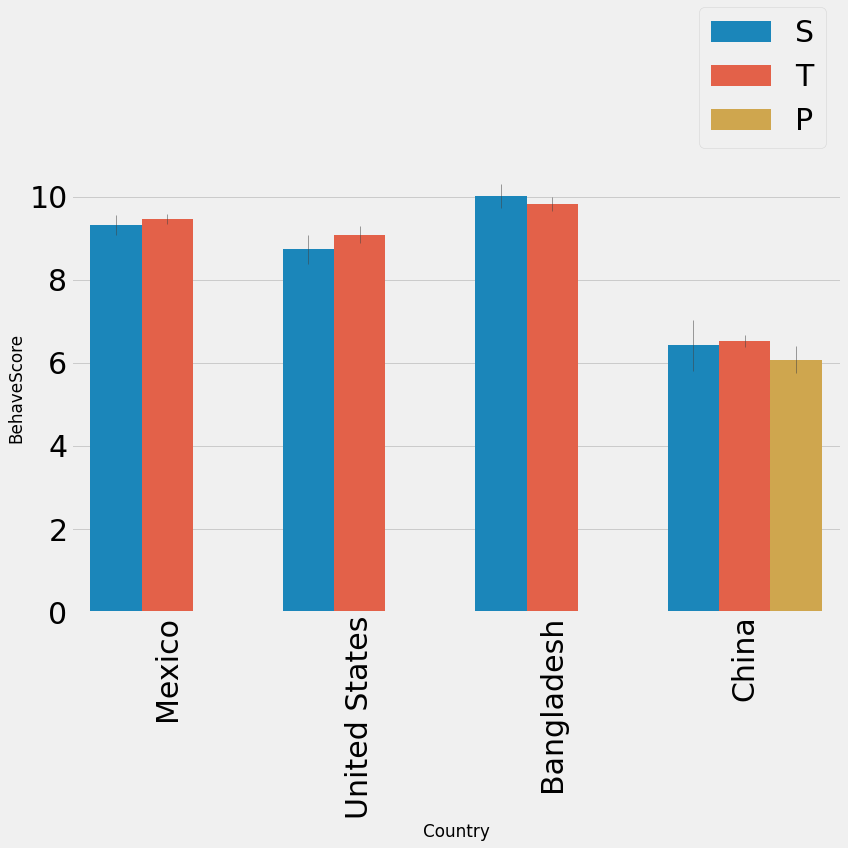

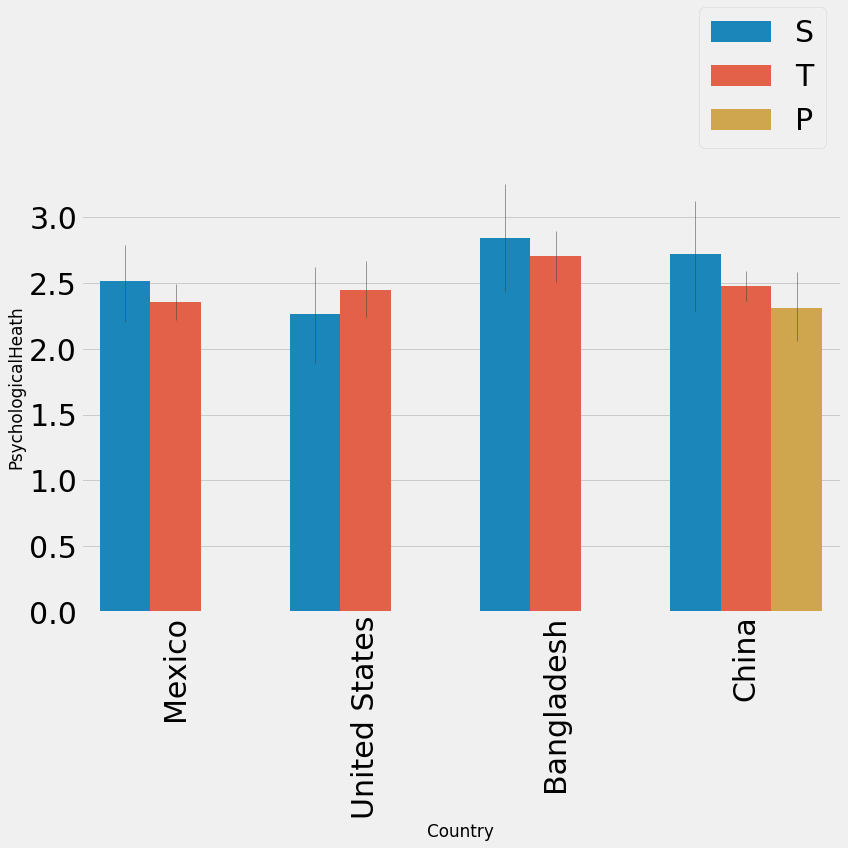

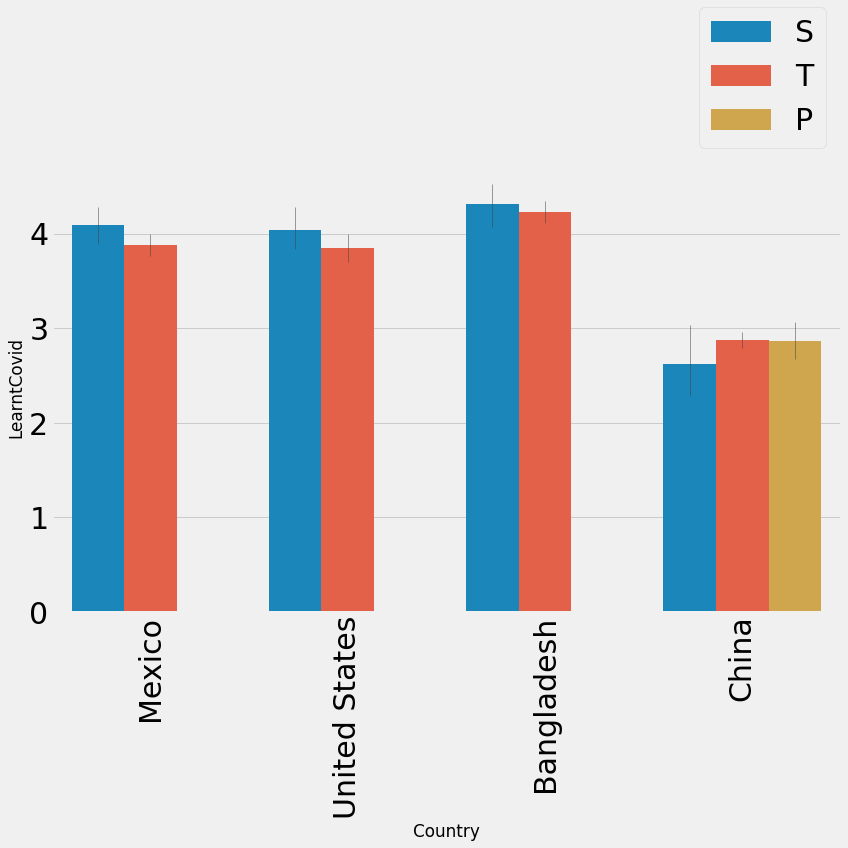

In [124]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')
cleaned =df[df['Country'].isin(countries)]
for c in criterion:
    for f in field:
        ax = sns.barplot(x="Country", y=c,hue=f, data=cleaned,ci=90,errwidth=0.5)  
        plt.xticks(rotation=90)
        plt.legend(bbox_to_anchor=(1, 1), loc=4,fontsize=30)
        plt.tight_layout()
        plt.savefig(os.path.join('Graph',f'{c}_{f}.png'))
        plt.show()

In [17]:
df.groupby(['Country'])['Profession'].value_counts()

Country    Profession              
Algeria    Academian/Administration     1
Argentina  Medical Professionals        1
Australia  Academian/Administration     1
           Medical Professionals        1
           Others                       1
                                       ..
Venezuela  Medical Professionals        2
Wales      Medical Professionals        2
Yemen      Medical Professionals        1
Zambia     Academian/Administration    57
           Medical Professionals       19
Name: Profession, Length: 97, dtype: int64